### 1) Importing Libraries and Data Frame

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Importing India_Tv_Commerce.csv dataframe

path = r'/Users/matthewabrams/Downloads/India_Tv_Commerce.csv'
tv = pd.read_csv(os.path.join(path), index_col = False)
tv.drop(columns = ('Column1'), inplace = True)
tv 

,Brand,Resolution,Size,Selling Price in US dollars,Selling Price in Indian Rupees,Original Price in Indian Rupees,Percent Off,Operating System,Rating
0,Hisense,QLED Ultra HD,75,6499.87,499990,499990,0%,Android,4.2
1,Samsung,QLED Ultra HD,65,6121.70,470900,470900,0%,Tizen,4.2
2,SONY,Ultra HD LED,65,6109.99,469999,529900,11%,Android,5.0
3,Sharp,Full HD LED,70,5848.70,449900,449900,0%,Linux,4.2
4,Samsung,Full HD LED,75,5458.70,419900,419900,0%,Tizen,4.2
...,...,...,...,...,...,...,...,...,...
907,RGL,Full HD LED,24,70.97,5459,12000,55%,HomeOS,3.9
908,Micromax,HD LED,20,69.73,5364,10990,51%,Android,4.1
909,RGL,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9
910,RGL,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9


In [3]:
# Printing a subset of India_Tv_Commerce.csv dataframe by columns by numerical data (excluding categorical data)

tv_numerical = tv[['Rating', 'Selling Price in US dollars']]
tv_numerical

,Rating,Selling Price in US dollars
0,4.2,6499.87
1,4.2,6121.70
2,5.0,6109.99
3,4.2,5848.70
4,4.2,5458.70
...,...,...
907,3.9,70.97
908,4.1,69.73
909,3.9,67.60
910,3.9,67.60


### 2) Elbow Technique

In [4]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [5]:
score = [kmeans[i].fit(tv_numerical).score(tv_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-667938311.7200563,
 -218669683.48137376,
 -111721633.18417549,
 -70368460.16715002,
 -40819834.46319241,
 -27167564.229973733,
 -20962185.793262187,
 -15369711.758098109,
 -12476185.982349714]

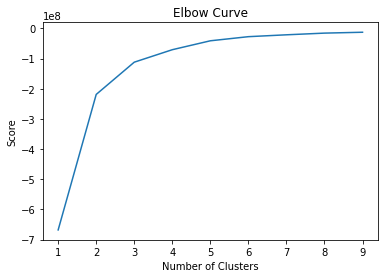

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3) k-means clustering

In [7]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [8]:
# Fit the k-means object to the data.

kmeans.fit(tv_numerical)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [9]:
tv_numerical['clusters'] = kmeans.fit_predict(tv_numerical)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_58478/663925802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_numerical['clusters'] = kmeans.fit_predict(tv_numerical)


In [10]:
tv_numerical.head(20)

,Rating,Selling Price in US dollars,clusters
0,4.2,6499.87,1
1,4.2,6121.70,1
2,5.0,6109.99,1
3,4.2,5848.70,1
4,4.2,5458.70,1
5,4.2,5011.50,1
6,4.2,5006.29,1
7,4.2,4549.99,1
8,4.6,4224.87,1
9,4.2,4143.10,1


In [11]:
tv_numerical['clusters'].value_counts()

0    721
2    155
1     36
Name: clusters, dtype: int64

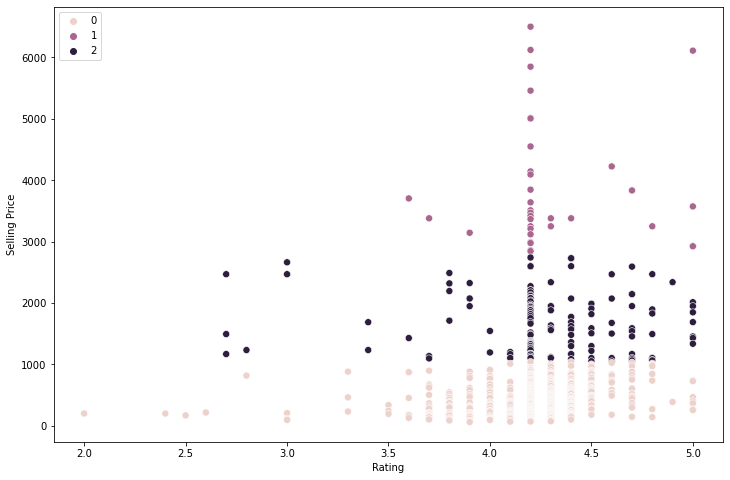

In [12]:
# Plot the clusters for the "Rating" and "Selling Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = tv_numerical['Rating'], y = tv_numerical['Selling Price in US dollars'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Selling Price') # Label y-axis.
plt.show()

In [13]:
tv_numerical.loc[tv_numerical['clusters'] == 2, 'color'] = 'dark purple'
tv_numerical.loc[tv_numerical['clusters'] == 1, 'color'] = 'purple'
tv_numerical.loc[tv_numerical['clusters'] == 0, 'color'] = 'salmon colored'

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
tv_numerical.groupby('color').agg({'Rating':['mean', 'median'], 
                         'Selling Price in US dollars':['mean', 'median']})

Rating        Selling Price in US dollars          
                    mean median                        mean    median
color                                                                
dark purple     4.268387    4.2                 1665.852645  1585.870
purple          4.302778    4.2                 3869.645000  3444.995
salmon colored  4.212899    4.2                  424.747115   388.700

In [15]:
# The average selling price received for the dark purple cluster group is approximately $320 which is significally smaller than the other three cluster groups.
# The average selling price received for the pink cluster group is approximately $4096 which is significally larger than the other three cluster groups.
# The average selling price received for the pink cluster group is approximately $2047 
# The average selling price received for the salmon colored cluster group is approximately $904

# We can see that the average customer rating for televisions that costs below $500 is lower than the average rating for televisions costing over $2000
# However, the average customer rating for televisions that cost approximately $1000 is slighty higher than those that cost more that $2000.
# We can infer that customer rating is likely to be high based on the quality of the television within a reasonable price, not too cheap, yet not too expensive.


### 4) Concating Datasets

In [16]:
# Subset of tv_numerical column only including cluster columns

tv_cluster = tv_numerical[['clusters','color']]

In [17]:
# Concating two datasets

frames = [tv,tv_cluster]
df_concat = pd.concat(frames, axis = 1)
df_concat

,Brand,Resolution,Size,Selling Price in US dollars,Selling Price in Indian Rupees,Original Price in Indian Rupees,Percent Off,Operating System,Rating,clusters,color
0,Hisense,QLED Ultra HD,75,6499.87,499990,499990,0%,Android,4.2,1,purple
1,Samsung,QLED Ultra HD,65,6121.70,470900,470900,0%,Tizen,4.2,1,purple
2,SONY,Ultra HD LED,65,6109.99,469999,529900,11%,Android,5.0,1,purple
3,Sharp,Full HD LED,70,5848.70,449900,449900,0%,Linux,4.2,1,purple
4,Samsung,Full HD LED,75,5458.70,419900,419900,0%,Tizen,4.2,1,purple
...,...,...,...,...,...,...,...,...,...,...,...
907,RGL,Full HD LED,24,70.97,5459,12000,55%,HomeOS,3.9,0,salmon colored
908,Micromax,HD LED,20,69.73,5364,10990,51%,Android,4.1,0,salmon colored
909,RGL,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9,0,salmon colored
910,RGL,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9,0,salmon colored


### 5) Exporting Dataset

In [18]:
df_concat.to_csv(r'/Users/matthewabrams/Downloads/tv_final.csv')